# Policy Iteration and Solvers: Homework

## Problem 1: Policy Function Iteration and Value Function Iteration

Compare the speed and accuracy of:
1. Standard value function iteration
2. Value function iteration with policy iteration improvement step.
3. Policy function iteration.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import packages
import matplotlib.pyplot as plt
from ConsumptionSavingsModel import ConsumptionSavings
import numpy as np
from scipy.interpolate import interp1d
import time


In [3]:
cs = ConsumptionSavings()

'''
# Default structural parameters: 
beta        = 0.99, 
sigma       = 1, 
y           = 1, 
amin        = -1, 
amax        = 1, 
grid_size_a = 200, 
gird_size_c = 500,
asupply     = 0, 

# Default simulation parameters:
max_iter        = 10000, 
max_howard_iter = 100, 
tolerance       = 1e-7, 
agrid_curvature = 1,
cgrid_curvature = 1, 
update=0.2 # update rate for the policy function iteration
'''

a = cs.a
y = cs.y
beta = cs.beta
r = 1/beta - 1

# Solve the model using VFI, VFI with Howard improvement, and PFI
v_vfi, c_policy_vfi, savings_policy_vfi = cs.solve_HH(r, 'VFI')
v_howard, c_policy_howard, savings_policy_howard = cs.solve_HH(r, 'VFI_Howard')
c_policy_pfi, savings_policy_pfi = cs.solve_HH(r, 'PFI')

# Compute the error between the methods with true value
print(f'Error of VFI is {sum((y + r * a - c_policy_vfi)**2):.3e}.')
print(f'Error of VFI with Howard improvement is {sum((y + r * a - c_policy_howard)**2):.3e}.')
print(f'Error of PFI is {sum((y + r * a - c_policy_pfi)**2):.3e}.')

Converged in 1365 iterations. Elapsed time of VFI is 2.812 seconds.
Converged in 13 iterations. Elapsed time of VFI with Howard improvement is 0.169 seconds.
Converged in 3323 iterations. Elapsed time of PFI is 0.473 seconds.
Error of VFI is 1.928e-04.
Error of VFI with Howard improvement is 1.775e-04.
Error of PFI is 7.687e-09.


The VFI method with Howard improvement is the fastest, followed by the policy function iteration, and the VFI without Howard improvement. The policy function iteration yields the highest accuracy, followed by the VFI methods whose accuracies are similar. 

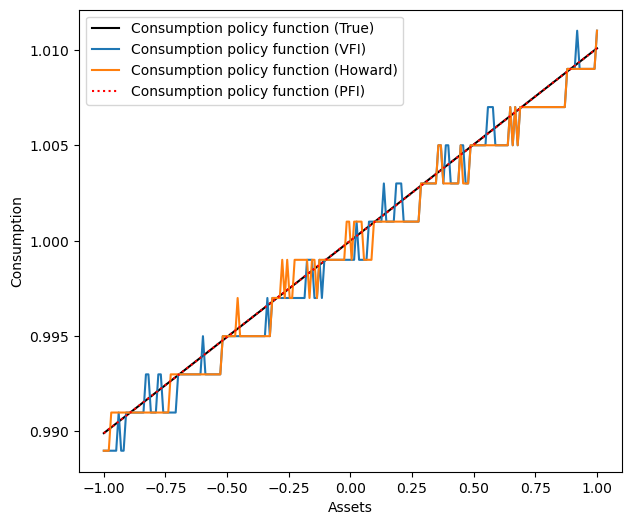

In [4]:
# plot consumption against true consumption function
plt.figure(figsize=(7, 6))
plt.plot(a, y + r * a, label='Consumption policy function (True)', color='black')
plt.plot(a, c_policy_vfi, label='Consumption policy function (VFI)')
plt.plot(a, c_policy_howard, label='Consumption policy function (Howard)')
plt.plot(a, c_policy_pfi, label='Consumption policy function (PFI)', linestyle=':', color='red')
plt.xlabel('Assets')
plt.ylabel('Consumption')
plt.legend()
plt.show()

## Problem 2: Newton-Raphson method

1. Write a function for the Newton-Rapshon method
2. Apply it to find the interest rate that clears the asset market. (Same calibration as in class.)
3. Compare the speed and accuracy to the bisection method.


In [5]:
# Note: Newton-Raphson method incorporated in ConsumptionSavings class
min_r = (1/beta) - 1 - 0.1
max_r = (1/beta) - 1 + 0.1

rstar_NR = cs.solve_R(min_r, max_r, 'PFI', 'NR')
rstar_bisection = cs.solve_R(min_r, max_r, 'PFI', 'bisection')

# Compute the error between the methods with true value
print(f'The true interest rate that clears the asset market is {r:.2f}.')
print(f'The interest rate calculated from the Newton-Raphson method is {rstar_NR:.10f}. The error is {abs(rstar_NR - r):.3e}.')
print(f'The interest rate calculated from the bisection method is {rstar_bisection:.10f}. The error is {abs(rstar_bisection - r):.3e}.')


Elapsed time of Newton-Raphson method is 6.274 seconds.
Elapsed time of bisection method is 38.734 seconds.
The true interest rate that clears the asset market is 0.01.
The interest rate calculated from the Newton-Raphson method is 0.0100465894. The error is 5.442e-05.
The interest rate calculated from the bisection method is 0.0100465851. The error is 5.443e-05.


The Newton-Raphson method is much faster than the bisection method. While their accuracies are almost identical in this problem, the bisection method is more robust to non-linearities. 


## Problem 3: FOC from Value Function

The FOC for the value function is
\begin{align*}
u'(c(a)) &= \beta (1 + r) V'(a'(a)) \\
a'(a) &= (1+r)a + y - c(a)
\end{align*}

The envelope condition for the value function is
$$
u'(c(a)) = V'(a).
$$


1. Starting with an initial guess $V_0'(a)$, use these conditions to iterate over the derivative of the value function until convergence.
2. Compare speed and accuracy to the three methods in Problem (1).

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.

In [6]:
# Solve the model using FOC from value function
c_policy_foc, savings_policy_foc = cs.solve_HH(r, 'FOC')

# Compute the error between the methods with true value
print(f'Error of VFI is {sum((y + r * a - c_policy_vfi)**2):.3e}.')
print(f'Error of VFI with Howard improvement is {sum((y + r * a - c_policy_howard)**2):.3e}.')
print(f'Error of PFI is {sum((y + r * a - c_policy_pfi)**2):.3e}.')
print(f'Error of FOC Method from value function is {sum((y + r * a - c_policy_foc)**2):.3e}.')

Converged in 3830 iterations. Elapsed time of FOC method from value function is 0.525 seconds.
Error of VFI is 1.928e-04.
Error of VFI with Howard improvement is 1.775e-04.
Error of PFI is 7.687e-09.
Error of FOC Method from value function is 5.709e-09.


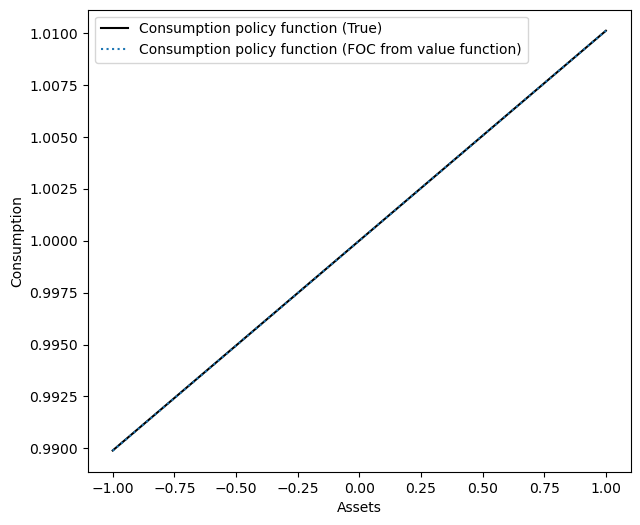

In [7]:
# plot consumption against true consumption function
plt.figure(figsize=(7, 6))
plt.plot(a, y + r * a, label='Consumption policy function (True)', color='black')
plt.plot(a, c_policy_foc, label='Consumption policy function (FOC from value function)', linestyle=':')
plt.xlabel('Assets')
plt.ylabel('Consumption')
plt.legend()
plt.show()

Compared to the speed and accuracy of the three methods in Problem (1), the method using the FOC from the value function has the highest accuracy, and the speed is comparable to that of a policy function iteration. 